In [ ]:
#!pip install vmdpy
# vmd taken from:
# https://vamsivk1995.medium.com/introduction-to-variational-mode-decomposition-vmd-d7100210a56a

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vmdpy import VMD

In [40]:
#get data 
df = pd.read_csv('Data Extraction/daily data/AAPL_daily.csv')
close = df['Close/Last']
close = close.to_numpy()
close = [x.replace('$', '') for x in close]
close = [float(x) for x in close]

#differenced data
diff = np.diff(close)
diff2 = np.diff(diff)
#stationary?
print(np.mean(diff))
print(np.mean(diff2))

-0.07608051689860834
0.00026949085123309546


In [20]:
alpha = 5000      # moderate bandwidth constraint  
tau = 0           # noise-tolerance (no strict fidelity enforcement)  
K = 3              # 3 modes  
DC = 0             # no DC part imposed  
init = 1           # initialize omegas uniformly  
tol = 1e-7
u, u_hat, omega = VMD(close, alpha, tau, K, DC, init, tol)

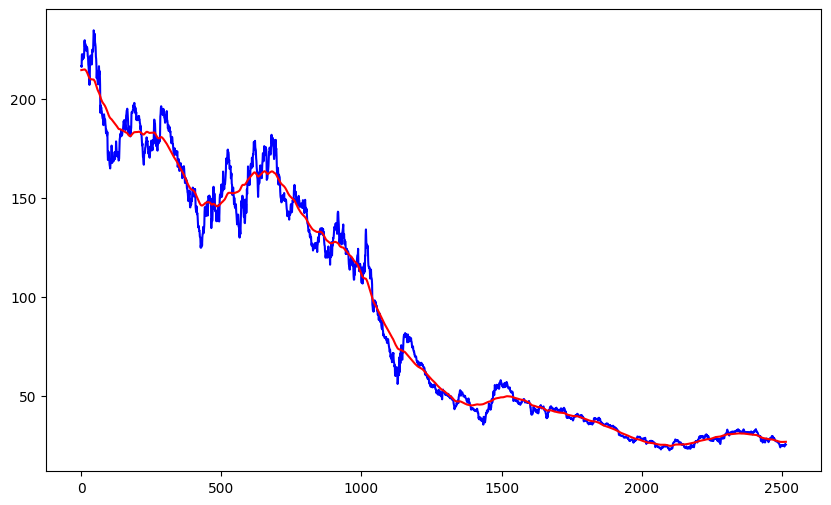

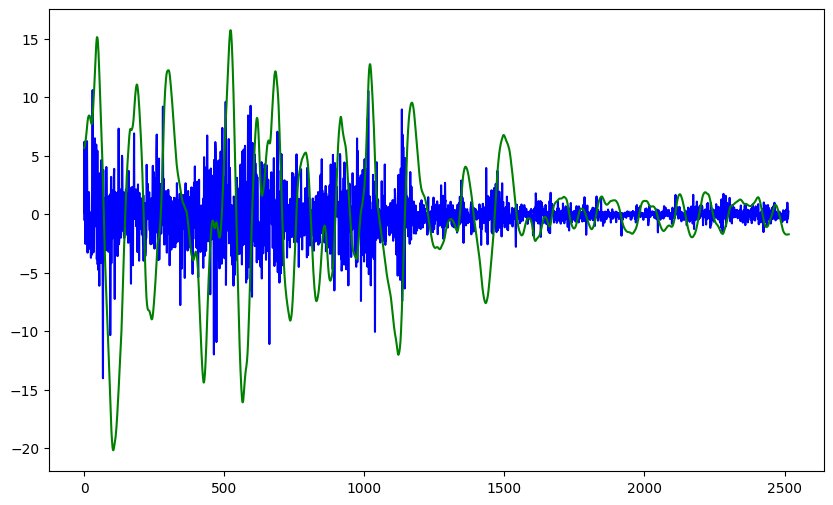

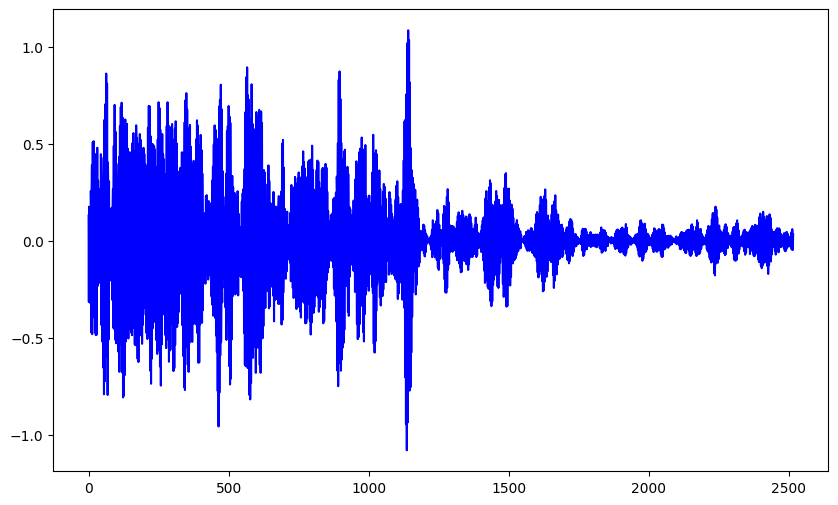

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(close, 'b', label='Original signal')
plt.plot(u[0], 'r', label='Mode 1')
plt.figure(figsize=(10, 6))
plt.plot(diff, 'b', label='diff signal')
plt.plot(u[1], 'g', label='Mode 2')

plt.figure(figsize=(10, 6))
plt.plot(u[2], 'b', label='Mode 3')
plt.show()